In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
print(df['ocean_proximity'].unique())
print(df.isnull().sum())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [5]:
one_hot_encoded = pd.get_dummies(df['ocean_proximity'])
one_hot_encoded = one_hot_encoded.astype(int)
df = pd.concat([df, one_hot_encoded], axis=1)
df.drop('ocean_proximity', axis=1, inplace=True)

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   <1H OCEAN           20640 non-null  int32  
 10  INLAND              20640 non-null  int32  
 11  ISLAND              20640 non-null  int32  
 12  NEAR BAY            20640 non-null  int32  
 13  NEAR OCEAN          20640 non-null  int32  
dtypes: float64(9), int32(5)
memory usage: 1.8 MB


In [8]:
df.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82,0.44,0.32,0.00,0.11,0.13
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62,0.50,0.47,0.02,0.31,0.33
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00,0.00,0.00,0.00,0.00,0.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00,0.00,0.00,0.00,0.00,0.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00,0.00,0.00,0.00,0.00,0.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00,1.00,1.00,0.00,0.00,0.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00,1.00,1.00,1.00,1.00,1.00


In [9]:
tb = df['total_bedrooms'].isna()
df[tb]
df['total_bedrooms'].dropna(inplace= True)
df.reset_index(inplace=True, drop=True)

In [10]:
df.corr().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.00,-0.92,-0.11,0.04,0.07,0.10,0.06,-0.02,-0.05,0.32,-0.06,0.01,-0.47,0.05
latitude,-0.92,1.00,0.01,-0.04,-0.07,-0.11,-0.07,-0.08,-0.14,-0.45,0.35,-0.02,0.36,-0.16
housing_median_age,-0.11,0.01,1.00,-0.36,-0.32,-0.30,-0.30,-0.12,0.11,0.05,-0.24,0.02,0.26,0.02
total_rooms,0.04,-0.04,-0.36,1.00,0.93,0.86,0.92,0.20,0.13,-0.00,0.03,-0.01,-0.02,-0.01
total_bedrooms,0.07,-0.07,-0.32,0.93,1.00,0.88,0.98,-0.01,0.05,0.02,-0.01,-0.00,-0.02,0.00
population,0.10,-0.11,-0.30,0.86,0.88,1.00,0.91,0.00,-0.02,0.07,-0.02,-0.01,-0.06,-0.02
households,0.06,-0.07,-0.30,0.92,0.98,0.91,1.00,0.01,0.07,0.04,-0.04,-0.01,-0.01,0.00
median_income,-0.02,-0.08,-0.12,0.20,-0.01,0.00,0.01,1.00,0.69,0.17,-0.24,-0.01,0.06,0.03
median_house_value,-0.05,-0.14,0.11,0.13,0.05,-0.02,0.07,0.69,1.00,0.26,-0.48,0.02,0.16,0.14
<1H OCEAN,0.32,-0.45,0.05,-0.00,0.02,0.07,0.04,0.17,0.26,1.00,-0.61,-0.01,-0.31,-0.34


Text(188514.7726964593, 930, 'media')

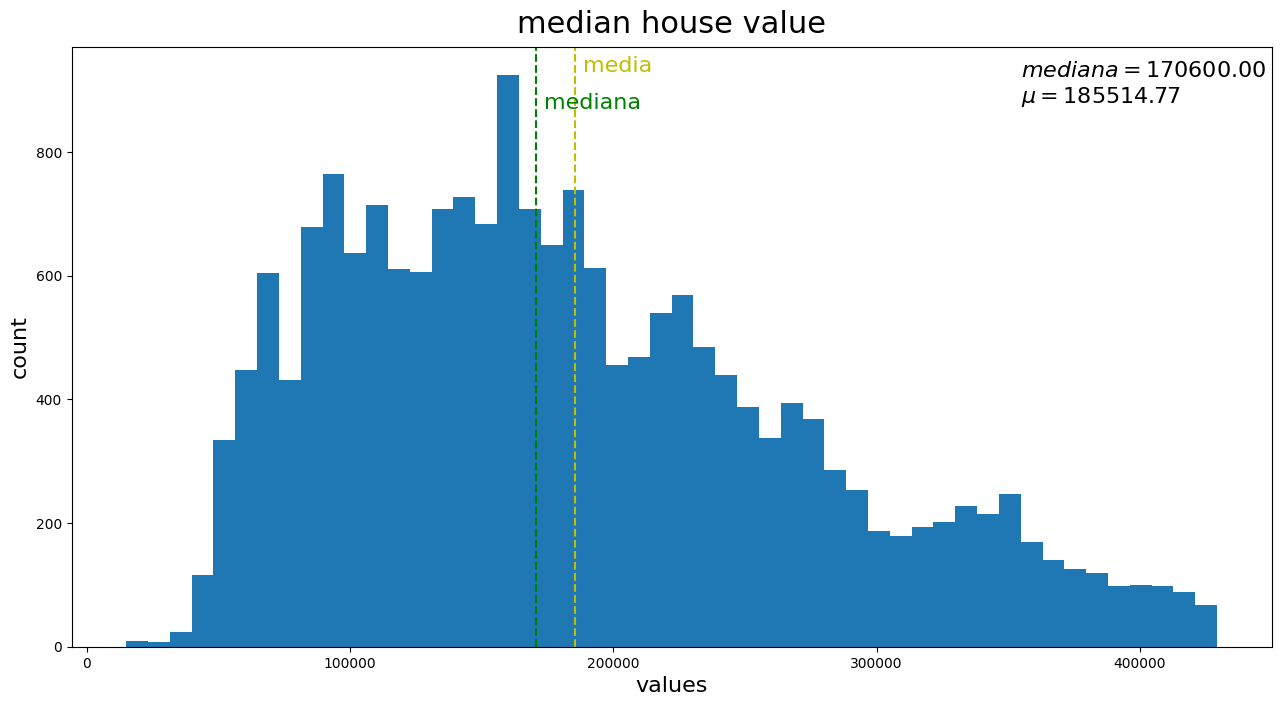

In [102]:
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)

IQR = Q3 - Q1
li = Q1 - 1.5 * IQR
ls = Q3 + 1.5 * IQR

df= df[(df['median_house_value']>= li) & (df['median_house_value']<= ls)]

fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0, 0, 1, 1])

mu, mediana = df['median_house_value'].mean(), df['median_house_value'].median()

ax.hist(df['median_house_value'], bins=50)
ax.set_title('median house value', fontsize=22, pad=10)
ax.set_xlabel('values',fontsize=16)
ax.set_ylabel('count', fontsize=16)
ax.annotate('$mediana = {0:.2f}$\n$\mu={1:.2f}$'.format(mediana,mu), xy=(355000,880),fontsize=16)

ax.axvline(x=mediana, color='g', linestyle='--')
ax.annotate('mediana', xy=(mediana+3000, 870), fontsize=16,color= 'g')

ax.axvline(x=mu, color='y', linestyle='--')
ax.annotate('media', xy=(mu+3000, 930), fontsize=16,color= 'y')


{'whiskers': [<matplotlib.lines.Line2D at 0x2948df7f950>,
 'caps': [<matplotlib.lines.Line2D at 0x2948df8c690>,
 'boxes': [<matplotlib.lines.Line2D at 0x2948df5fe10>],
 'medians': [<matplotlib.lines.Line2D at 0x2948df8dc90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2948df5f390>],
 'means': []}

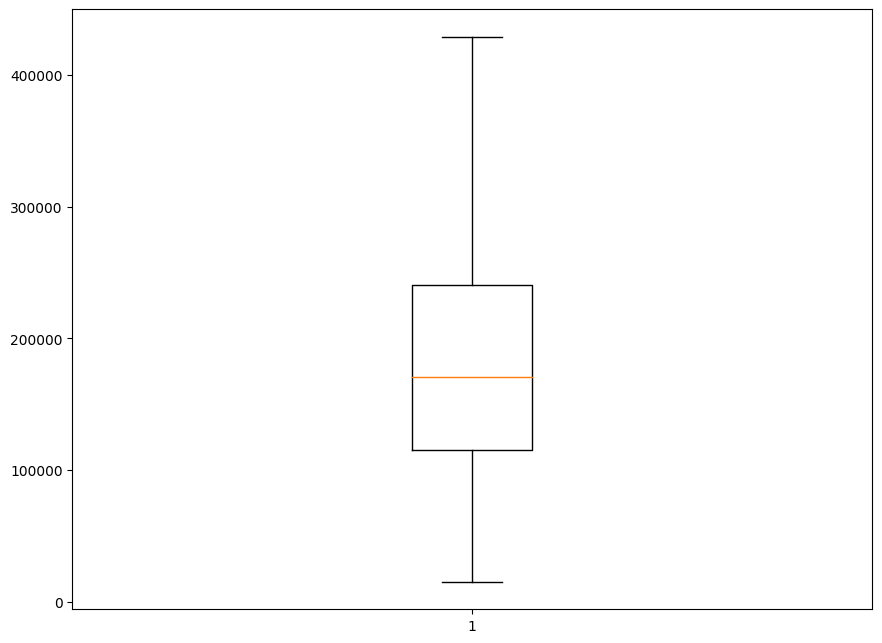

In [103]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0, 0, 1, 1])

ax.boxplot(df['median_house_value'])